# Analisis Exploratorio y Curacion de Datos - Parte 1

## Ejercicio 1: Tablas de Crecimiento
1. Descargar dataset en CSV https://github.com/DiploDatos/AnalisisYCuracion/blob/master/input/wtageinf.csv <br>
   Basado en material de https://www.cdc.gov/growthcharts/percentile_data_files.htm
1. Graficar las curvas correspondientes a cada percentil para niños y niñas
    1. En la columna Sex, 1 representa a niños y 2 a niñas. 
    1. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.
    1. Un gráfico para cada sexo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv'
data = pd.read_csv(url)

In [6]:
data.head(5)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


In [11]:
data.shape

(76, 14)

In [51]:
boys = data[data['Sex'] == 1][['Agemos','P3','P5','P10','P25','P50','P75','P90','P95','P97']]
girls = data[data['Sex'] == 2][['Agemos','P3','P5','P10','P25','P50','P75','P90','P95','P97']]

Text(0.5, 0, 'Edad')

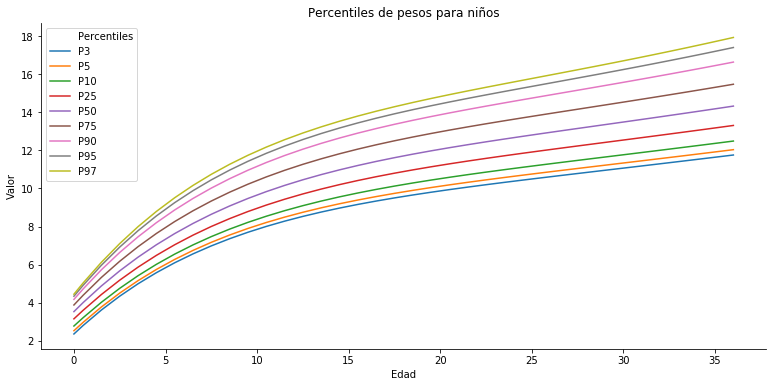

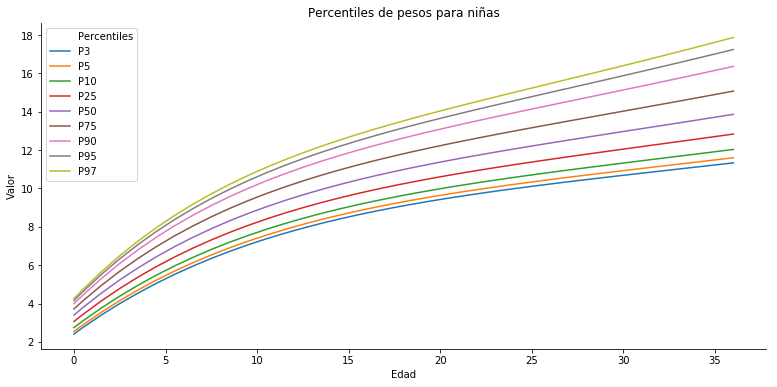

In [76]:
boys_melt = boys.melt('Agemos', var_name='cols',  value_name='vals')
girls_melt = girls.melt('Agemos', var_name='cols', value_name='vals')
boys_melt.columns = ['Agemos','Percentiles','Valores']
girls_melt.columns = ['Agemos','Percentiles','Valores']

#Plots para niños
plt.figure(figsize=(13,6))
plt.title('Percentiles de pesos para niños')
sns.lineplot(x='Agemos', 
             y='Valores', 
             hue='Percentiles', 
             data=boys_melt)
sns.despine()
plt.ylabel('Valor')
plt.xlabel('Edad')

#Plots para niñas
plt.figure(figsize=(13,6))
plt.title('Percentiles de pesos para niñas')
sns.lineplot(x='Agemos', 
             y='Valores', 
             hue='Percentiles', 
             data=girls_melt)
sns.despine()
plt.ylabel('Valor')
plt.xlabel('Edad')


## Ejercicio 2: Pasos Fronterizos
1. Descargar dataset en JSON:https://github.com/DiploDatos/AnalisisYCuracion/blob/master/input/pasos.json
1. Graficar un histograma agrupando por valor del atributo “province”.

In [3]:
url_2 = 'https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json'
data_2 = pd.read_json(url_2)

In [80]:
data_2.shape

(252, 3)

In [89]:
data_2.head(10)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


In [9]:
data_grouped = data_2.groupby(['province']).count()[['location']]
data_grouped.columns = ['Cantidad']
data_grouped = data_grouped.drop(index='AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ')
data_grouped.loc[data_grouped['Cantidad'] == 20, 'Cantidad'] = 21

data_grouped

,Cantidad
province,
Buenos Aires,48
Catamarca,3
Chaco,3
Chubut,15
Cordoba,3
Corrientes,15
Córdoba,1
Entre Rios,13
Formosa,11


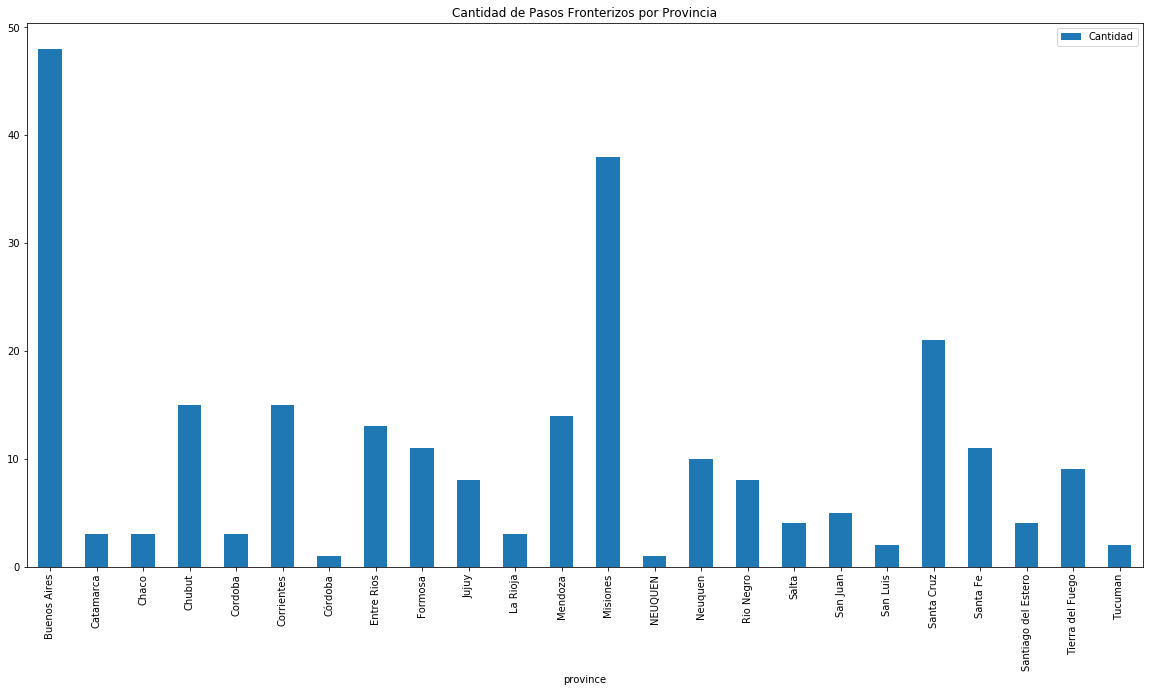

In [10]:

data_grouped.plot.bar(figsize=(20,10), title='Cantidad de Pasos Fronterizos por Provincia')


In [21]:
data_2[data_2['province'] == 'Santa Cruz']

,location,name,province
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
10,"[-52.2527012, -69.8852885]",MONTE AYMOND,Santa Cruz
11,"[-52.1304141, -69.5198778]",INTEGRACION AUSTRAL,Santa Cruz
12,"[-50.283977, -72.0558347]",AERO EL CALAFATE,Santa Cruz
13,"[-52.3274981, -68.3692192]",PASO CABO VIRGENES,Santa Cruz
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz
16,"[-51.6230485, -69.2168291]",PUERTO RIO GALLEGOS,Santa Cruz
17,"[-45.9146467, -71.6458095]",HUEMULES,Santa Cruz
